In [1]:
#%matplotlib

In [2]:
import pandas as pd
import numpy as np
import os
import json
import requests
import time
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import warnings
warnings.filterwarnings('ignore')

In [3]:
combined_data_csv = os.path.join("..", "data", "cleandata", "coll_n_weather_chris_stan_date_left_merge_period_intervals.csv")

csv = pd.read_csv(combined_data_csv, low_memory=False)

In [4]:
combined_data_df = pd.DataFrame(csv)
combined_data_df.head(2)

,DATE,Year / Month,Year / Week,UNIX DATE,Week,MONTH,YEAR,DEATHS,INJURIES,Corrected Year for Year / Week,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
0,2013-12-31,2013/12,2013/1,1388483880,1,12,2013,0.0,0.0,2014,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76
1,2013-12-31,2013/12,2013/1,1388483640,1,12,2013,0.0,0.0,2014,...,0.0,1021.22,31.36,1388520000,20.95,1388491200,9.97,15.22,1388534400,2.76


In [5]:
len(combined_data_df)

1116399

In [6]:
combined_data_df['Corrected Year / Week'][1116398]

'2019/1'

In [7]:
#combined_data_df=combined_data_df.sort_values('Corrected Year / Week', ascending=True)
#combined_data_df.head(1000)

In [8]:
#combined_data_df[corrected_year_week] = np.where(combined_data_df[Month]=12)

In [9]:
#combined_data_df.to_csv("../data/Chris/combined_data_with_period_intervals.csv", index = False, header = True)

In [10]:
combined_data_df.columns

Index(['DATE', 'Year / Month', 'Year / Week', 'UNIX DATE', 'Week', 'MONTH',
       'YEAR', 'DEATHS', 'INJURIES', 'Corrected Year for Year / Week',
       'Corrected Week for Year / Week', 'Corrected Year / Week', 'Day',
       'Detail', 'Moonphase', 'Summary', 'Sunrise', 'Sunset', 'cloudCover',
       'dewPoint', 'humidity', 'precipIntensity', 'precipIntensityMax',
       'precipProbability', 'pressure', 'temperatureMax', 'temperatureMaxTime',
       'temperatureMin', 'temperatureMinTime', 'visibility', 'windGust',
       'windGustTime', 'windSpeed'],
      dtype='object')

In [11]:
combined_data_df.dtypes

DATE                               object
Year / Month                       object
Year / Week                        object
UNIX DATE                           int64
Week                                int64
MONTH                               int64
YEAR                                int64
DEATHS                            float64
INJURIES                          float64
Corrected Year for Year / Week      int64
Corrected Week for Year / Week      int64
Corrected Year / Week              object
Day                                 int64
Detail                             object
Moonphase                         float64
Summary                            object
Sunrise                             int64
Sunset                              int64
cloudCover                        float64
dewPoint                          float64
humidity                          float64
precipIntensity                   float64
precipIntensityMax                float64
precipProbability                 

In [12]:
combined_data_df['DATE'] = combined_data_df['DATE'].astype(np.datetime64)

In [13]:
#combined_data_df.set_index('Year / Week')

In [14]:
#del combined_data_df['DATE']

In [15]:
#weekly_collisions = combined_data_df["Corrected Year / Week"].value_counts()
#weekly_collisions.head(2)

In [16]:
grouped_by_week_df = combined_data_df.groupby(['Corrected Year for Year / Week', 'Corrected Week for Year / Week'])
grouped_by_week_df.count().reset_index().head()

,Corrected Year for Year / Week,Corrected Week for Year / Week,DATE,Year / Month,Year / Week,UNIX DATE,Week,MONTH,YEAR,DEATHS,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
0,2014,1,2627,2627,2627,2627,2627,2627,2627,2627,...,2627,2627,2627,2627,2627,2627,2627,2627,2627,2627
1,2014,2,3706,3706,3706,3706,3706,3706,3706,3706,...,3706,3706,3706,3706,3706,3706,3706,3706,3706,3706
2,2014,3,3648,3648,3648,3648,3648,3648,3648,3648,...,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648
3,2014,4,4276,4276,4276,4276,4276,4276,4276,4276,...,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276
4,2014,5,3805,3805,3805,3805,3805,3805,3805,3805,...,3805,3805,3805,3805,3805,3805,3805,3805,3805,3805


In [17]:
avg_min_temp_weekly = grouped_by_week_df['temperatureMin'].mean()
avg_min_temp_weekly.head(2)

Corrected Year for Year / Week  Corrected Week for Year / Week
2014                            1                                 15.976783
                                2                                 21.183702
Name: temperatureMin, dtype: float64

In [18]:
collisions = grouped_by_week_df['temperatureMin'].count()
collisions.head(2)

Corrected Year for Year / Week  Corrected Week for Year / Week
2014                            1                                 2627
                                2                                 3706
Name: temperatureMin, dtype: int64

In [19]:
visibility = grouped_by_week_df['visibility'].mean()
cloudCover = grouped_by_week_df['cloudCover'].mean()
Moonphase = grouped_by_week_df['Moonphase'].mean()
windSpeed = grouped_by_week_df['windSpeed'].mean()
humidity = grouped_by_week_df['humidity'].mean()
precipIntensity = grouped_by_week_df['precipIntensity'].mean()
injuries = grouped_by_week_df['INJURIES'].sum()
deaths = grouped_by_week_df['DEATHS'].sum()

In [20]:
#print(injuries)

In [21]:
weekly_summary = pd.DataFrame({"Collisions": collisions, "Injuries": injuries, "Deaths": deaths, "Avg Min Temp": avg_min_temp_weekly,\
                              "Visibility": visibility, "Cloud Cover" : cloudCover, "Moonphase": Moonphase,\
                              "Windspeed": windSpeed, "Humidity" : humidity, "Precipitation Intensity" : precipIntensity})
weekly_summary.head()

Collisions  \
Corrected Year for Year / Week Corrected Week for Year / Week               
2014                           1                                     2627   
                               2                                     3706   
                               3                                     3648   
                               4                                     4276   
                               5                                     3805   

                                                               Injuries  \
Corrected Year for Year / Week Corrected Week for Year / Week             
2014                           1                                  608.0   
                               2                                  929.0   
                               3                                 1012.0   
                               4                                  835.0   
                               5                                  923.0   

                                                               Deaths  \
Corrected Year for Year / Week Corrected Week for Year / Week           
2014                           1                                  7.0   
                               2                                  7.0   
                               3                                  5.0   
                               4                                  3.0   
                               5                                  3.0   

                                                               Avg Min Temp  \
Corrected Year for Year / Week Corrected Week for Year / Week                 
2014                           1                                  15.976783   
                               2                                  21.183702   
                               3                                  32.301870   
                               4                                  12.920667   
                               5                                  20.003824   

                                                               Visibility  \
Corrected Year for Year / Week Corrected Week for Year / Week               
2014                           1                                 8.197758   
                               2                                 7.960103   
                               3                                 8.515548   
                               4                                 8.220451   
                               5                                 9.450696   

                                                               Cloud Cover  \
Corrected Year for Year / Week Corrected Week for Year / Week                
2014                           1                                  0.575569   
                               2                                  0.579652   
                               3                                  0.625156   
                               4                                  0.560101   
                               5                                  0.455911   

                                                               Moonphase  \
Corrected Year for Year / Week Corrected Week for Year / Week              
2014                           1                                0.238919   
                               2                                0.295159   
                               3                                0.510455   
                               4                                0.731513   
                               5                                0.597091   

                                                               Windspeed  \
Corrected Year for Year / Week Corrected Week for Year / Week              
2014                           1                                3.258481   
                               2                                3.245092   
       

In [22]:
df = weekly_summary.reset_index()
df.head()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
0,2014,1,2627,608.0,7.0,15.976783,8.197758,0.575569,0.238919,3.258481,0.675299,0.000186
1,2014,2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006
2,2014,3,3648,1012.0,5.0,32.301870,8.515548,0.625156,0.510455,1.778684,0.781845,0.002238
3,2014,4,4276,835.0,3.0,12.920667,8.220451,0.560101,0.731513,4.514790,0.606195,0.000081
4,2014,5,3805,923.0,3.0,20.003824,9.450696,0.455911,0.597091,2.210689,0.536993,0.000067


In [23]:
df['Year / Week'] = df['Corrected Year for Year / Week'].map(str) + "/" + df['Corrected Week for Year / Week'].map(str)
df.head()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity,Year / Week
0,2014,1,2627,608.0,7.0,15.976783,8.197758,0.575569,0.238919,3.258481,0.675299,0.000186,2014/1
1,2014,2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006,2014/2
2,2014,3,3648,1012.0,5.0,32.301870,8.515548,0.625156,0.510455,1.778684,0.781845,0.002238,2014/3
3,2014,4,4276,835.0,3.0,12.920667,8.220451,0.560101,0.731513,4.514790,0.606195,0.000081,2014/4
4,2014,5,3805,923.0,3.0,20.003824,9.450696,0.455911,0.597091,2.210689,0.536993,0.000067,2014/5


In [24]:
df.dtypes

Corrected Year for Year / Week      int64
Corrected Week for Year / Week      int64
Collisions                          int64
Injuries                          float64
Deaths                            float64
Avg Min Temp                      float64
Visibility                        float64
Cloud Cover                       float64
Moonphase                         float64
Windspeed                         float64
Humidity                          float64
Precipitation Intensity           float64
Year / Week                        object
dtype: object

In [74]:
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A46CF98>,
      dtype=object)

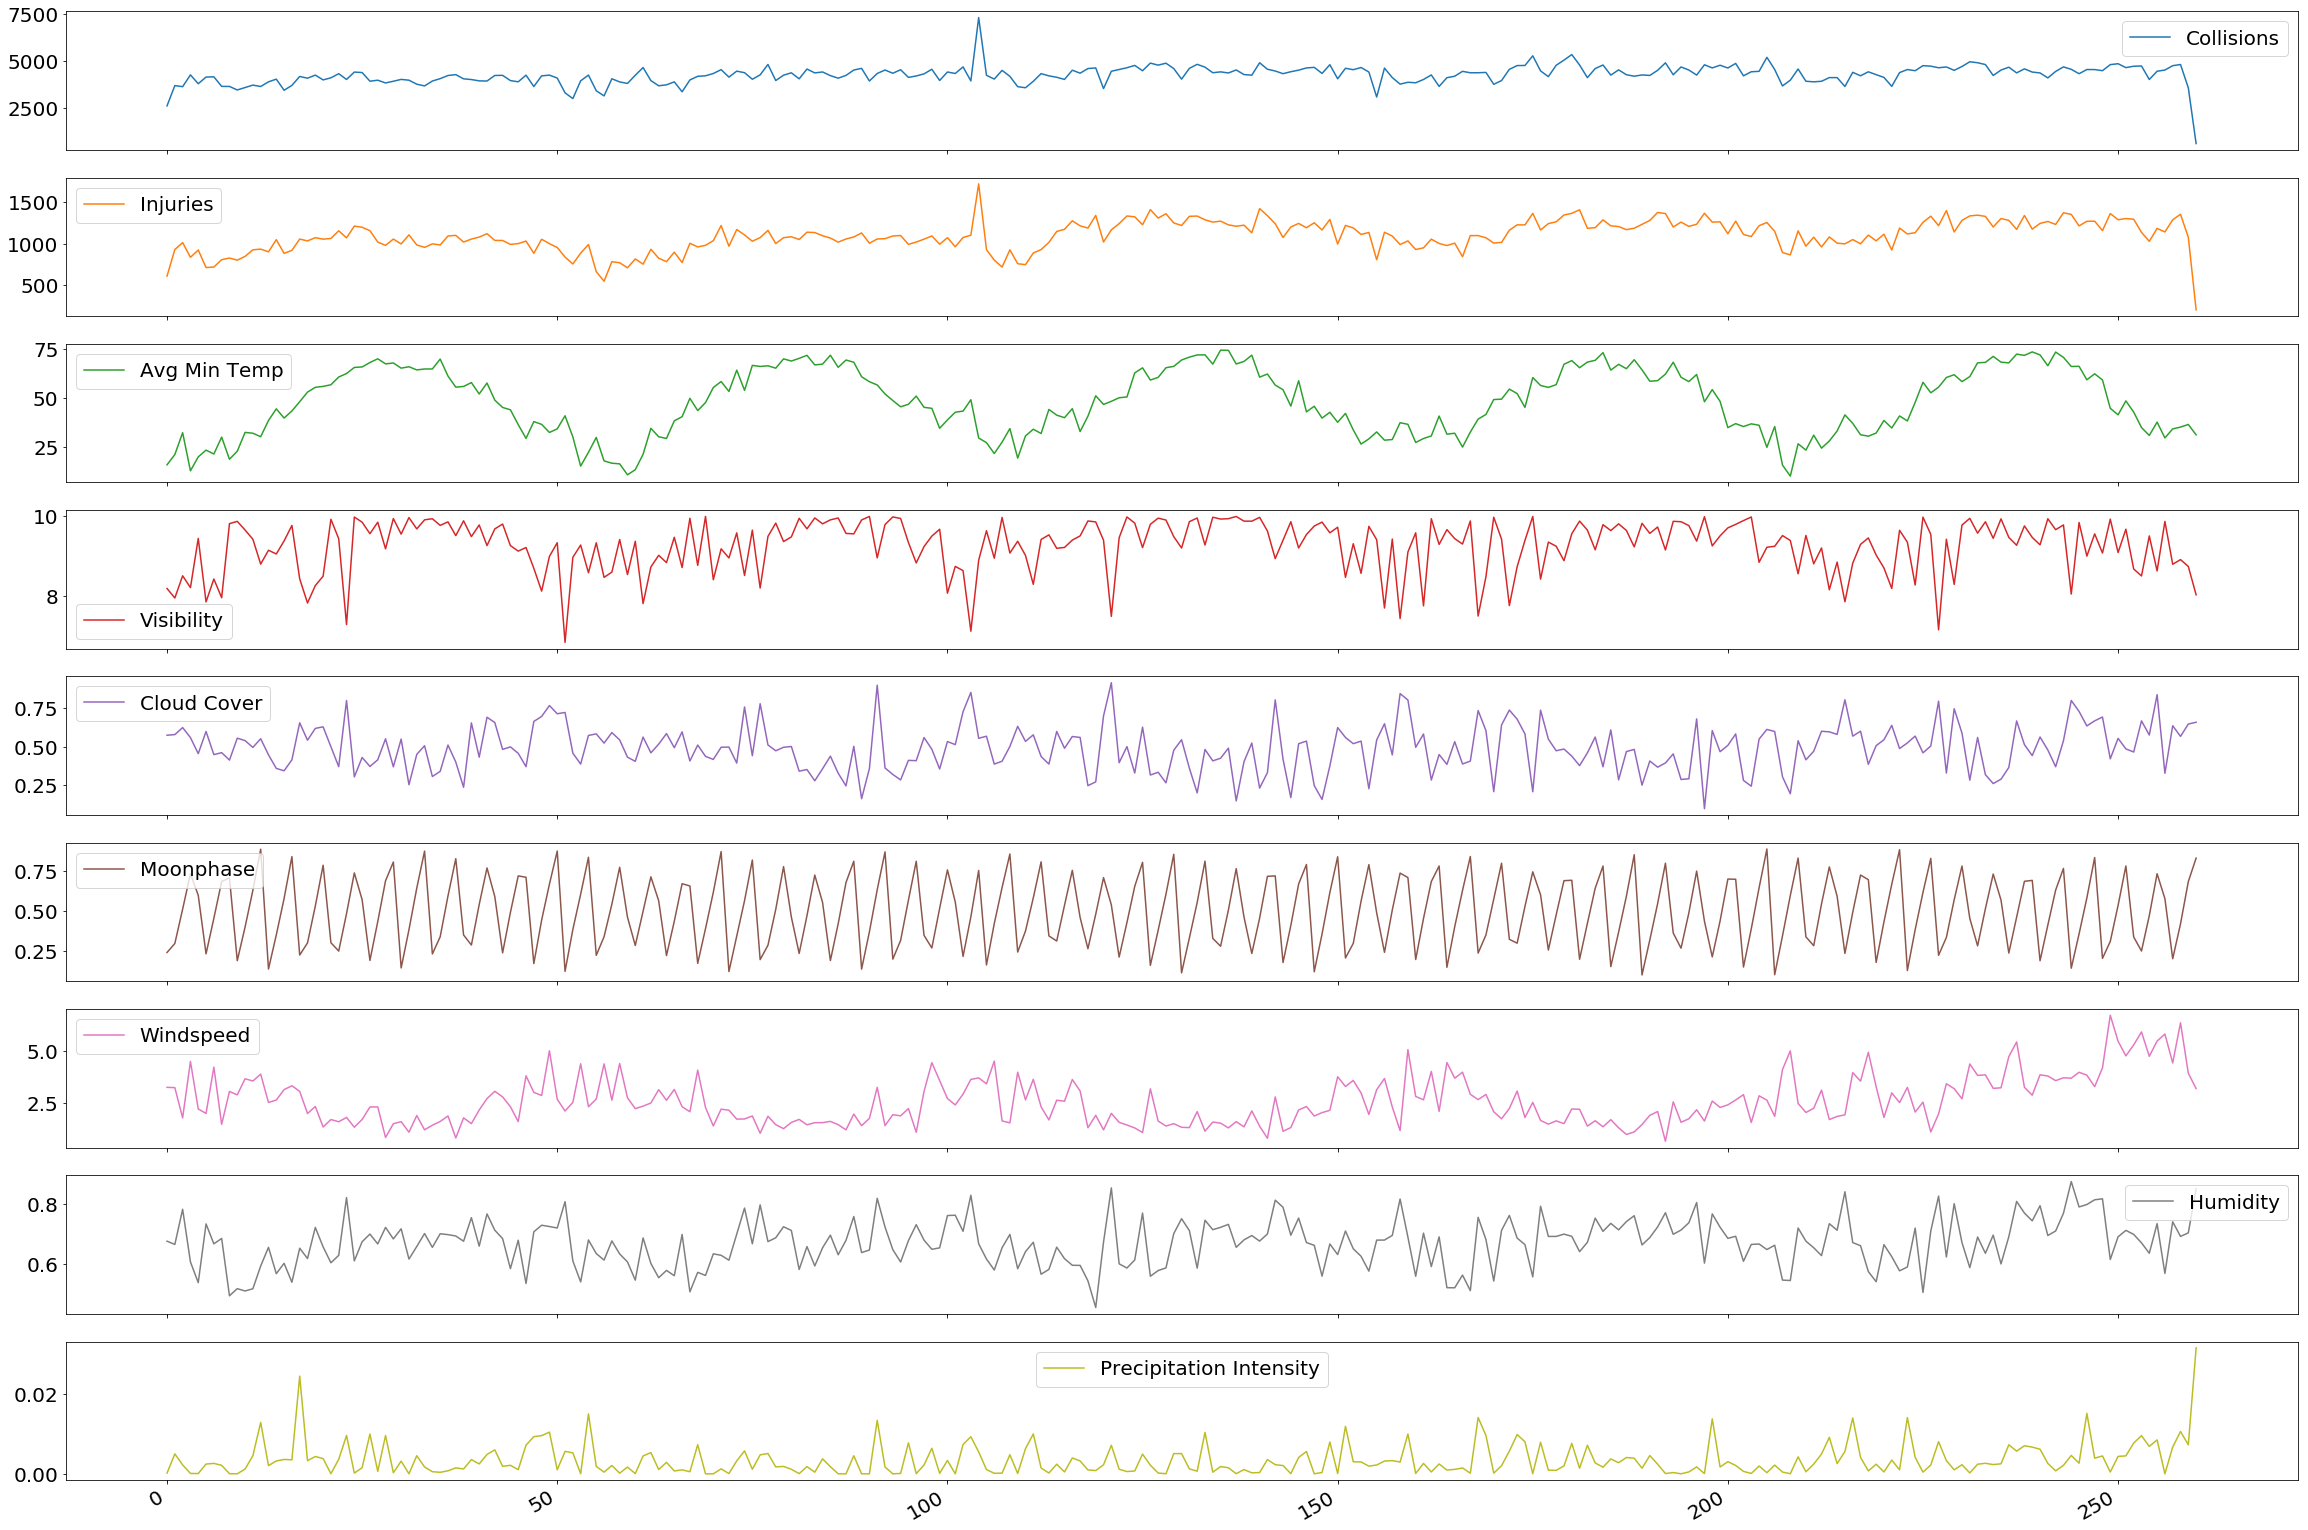

In [75]:
df.plot(subplots=True, figsize=(40, 30))

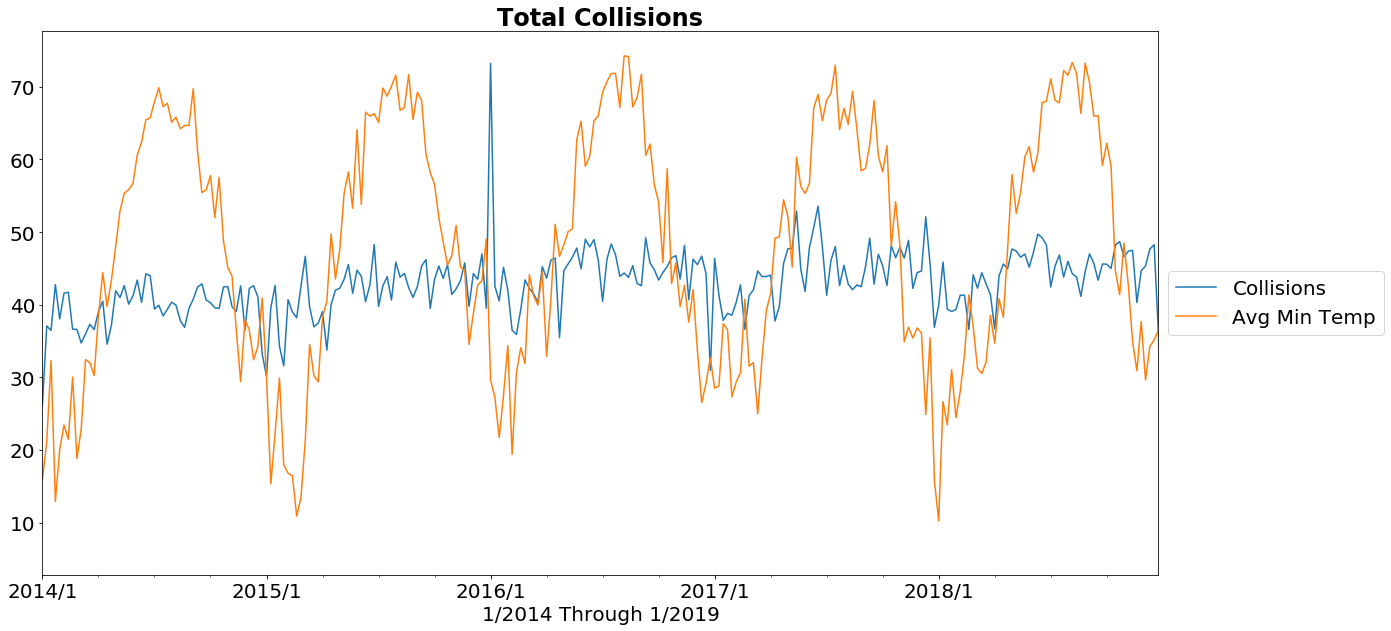

In [76]:
plt.plot(df['Year / Week'], df['Collisions']/100)
plt.plot(df['Year / Week'], df['Avg Min Temp'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Total Collisions', fontweight="bold")
plt.xlabel('1/2014 Through 1/2019')
plt.ylabel('')
plt.ylim()
plt.xlim("2014/1" , "2018/52")
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
#save figure
plt.savefig(os.path.join('..', 'images', 'mintemp-vs-deaths_daily.png'))
#show figure
plt.rcParams['figure.figsize'] = [20,10]
mpl.rcParams.update({'font.size': 20})
plt.show()

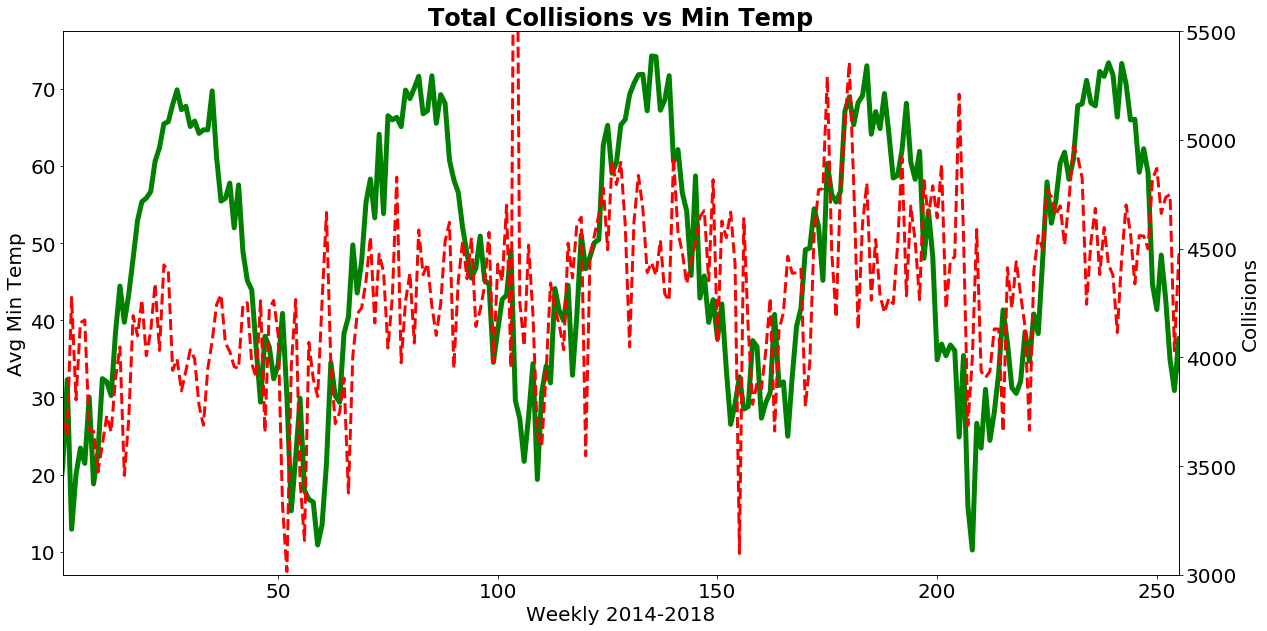

In [79]:
df.plot(y='Avg Min Temp', xlim=(1, 255), label=('Avg Min Temp'), legend=False, color='g', linewidth=5)
plt.ylabel('Avg Min Temp')
plt.xlabel('Weekly 2014-2018')
plt.title(f'Total Collisions vs Min Temp', fontweight="bold")

ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
ax.set_fontweight=('bold')
ax = df['Collisions'].plot(secondary_y=True, color='r', marker='', linewidth=3, linestyle='--')
ax.set_ylim(3000,5500)
ax.set_ylabel('Collisions')
plt.rcParams['figure.figsize'] = [20,10]
mpl.rcParams.update({'font.size': 20})
plt.savefig(os.path.join('..', 'images', 'Collisions lineplot vs Min Temp.png'))
plt.show()

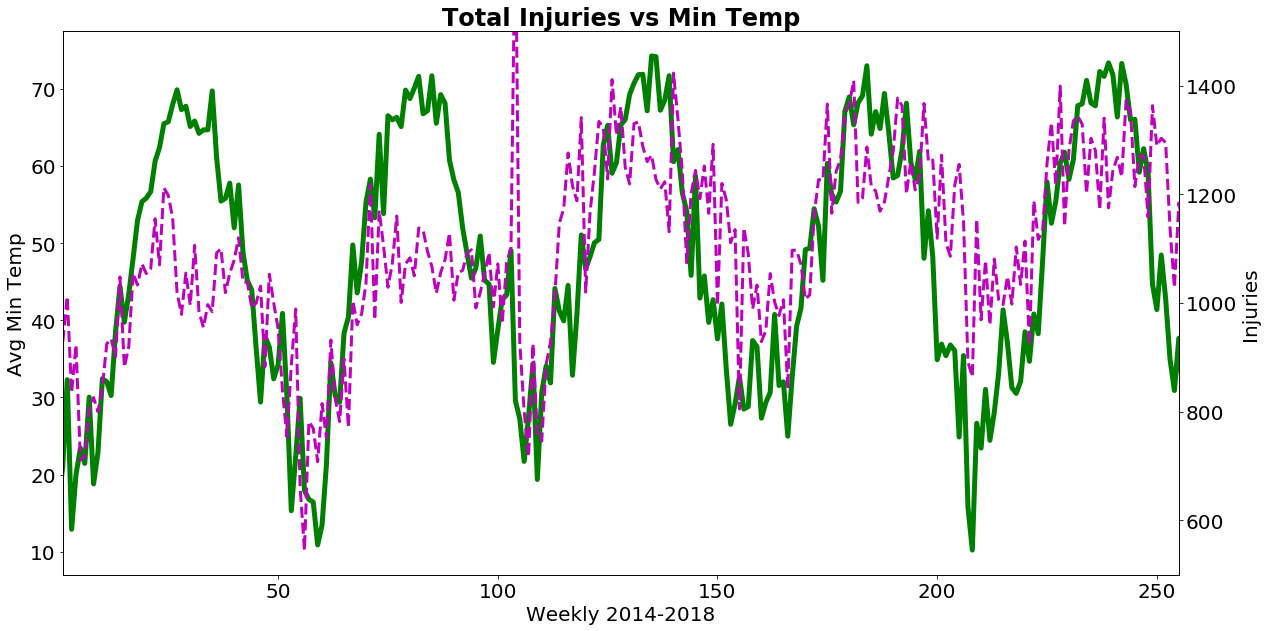

In [81]:
df.plot(y='Avg Min Temp', xlim=(1, 255), label=('Avg Min Temp'), legend=False, color='g', linewidth=5)
plt.ylabel('Avg Min Temp')
plt.xlabel('Weekly 2014-2018')
plt.title(f'Total Injuries vs Min Temp', fontweight="bold")

ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
ax.set_fontweight=('bold')
ax = df['Injuries'].plot(secondary_y=True, color='m', marker='', linewidth=3, linestyle='--')
ax.set_ylim(500,1500)
ax.set_ylabel('Injuries')
plt.rcParams['figure.figsize'] = [20,10]
mpl.rcParams.update({'font.size': 20})
plt.savefig(os.path.join('..', 'images', 'Injuries line plot vs Min Temp.png'))
plt.show()

# Injury Regression

In [30]:
df.columns

Index(['Corrected Year for Year / Week', 'Corrected Week for Year / Week',
       'Collisions', 'Injuries', 'Deaths', 'Avg Min Temp', 'Visibility',
       'Cloud Cover', 'Moonphase', 'Windspeed', 'Humidity',
       'Precipitation Intensity', 'Year / Week'],
      dtype='object')

In [31]:
df.describe()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2016.011494,26.402299,4277.390805,1094.164751,4.720307,47.802494,9.260093,0.491475,0.495693,2.576832,0.669085,0.003470
std,1.426353,15.091103,501.161659,183.019313,2.277467,16.490087,0.660158,0.152684,0.222264,1.158964,0.078618,0.004052
min,2014.000000,1.000000,621.000000,200.000000,0.000000,10.225070,6.849855,0.098184,0.098223,0.644533,0.453981,0.000000
25%,2015.000000,13.000000,4030.000000,996.000000,3.000000,34.266012,8.903154,0.387950,0.300080,1.633579,0.612245,0.000564
50%,2016.000000,26.000000,4287.000000,1097.000000,4.000000,48.048368,9.429604,0.497226,0.490709,2.313547,0.675299,0.002218
75%,2017.000000,39.000000,4560.000000,1226.000000,6.000000,64.110451,9.796562,0.583299,0.690373,3.257875,0.713111,0.004793
max,2019.000000,52.000000,7324.000000,1722.000000,13.000000,74.260866,10.000000,0.916851,0.886893,6.755580,0.874387,0.031700


In [32]:
x = df['Avg Min Temp']
s = df['Cloud Cover']
t = df['Visibility']
u = df['Humidity']
v = df['Precipitation Intensity']
w = df['Windspeed']
r = df['Moonphase']
y = df['Injuries']
z = df['Collisions']

In [33]:
#import seaborn as sns

In [110]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

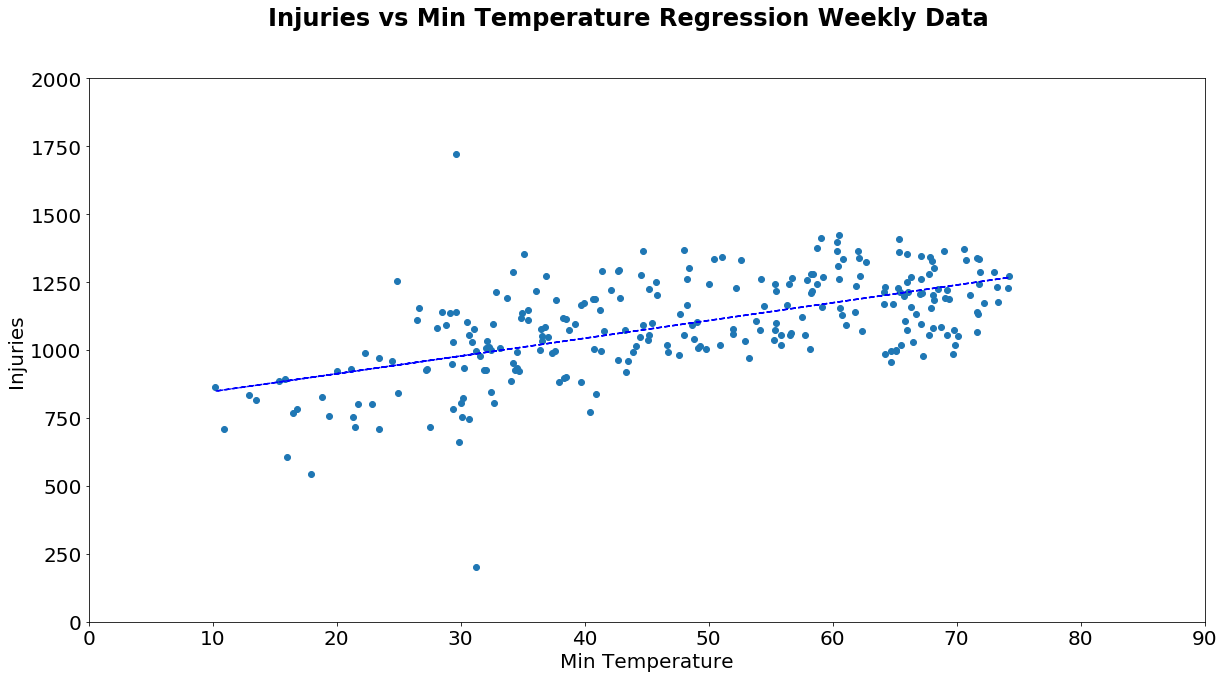

Slope: 6.531992617076217
Intercept: 781.919210373117
r-squared: 0.3463725349284649
p value: 1.0169193564761388e-25
Standard Error: 0.5575569394823334


In [111]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(0, 2000)

ax.set_xlabel("Min Temperature", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.savefig("../Images/Injuries vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("Slope:", slope)
print("Intercept:", intercept)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [36]:
(slope, intercept, _, _, _) = linregress(s, y)
fit = slope * s + intercept

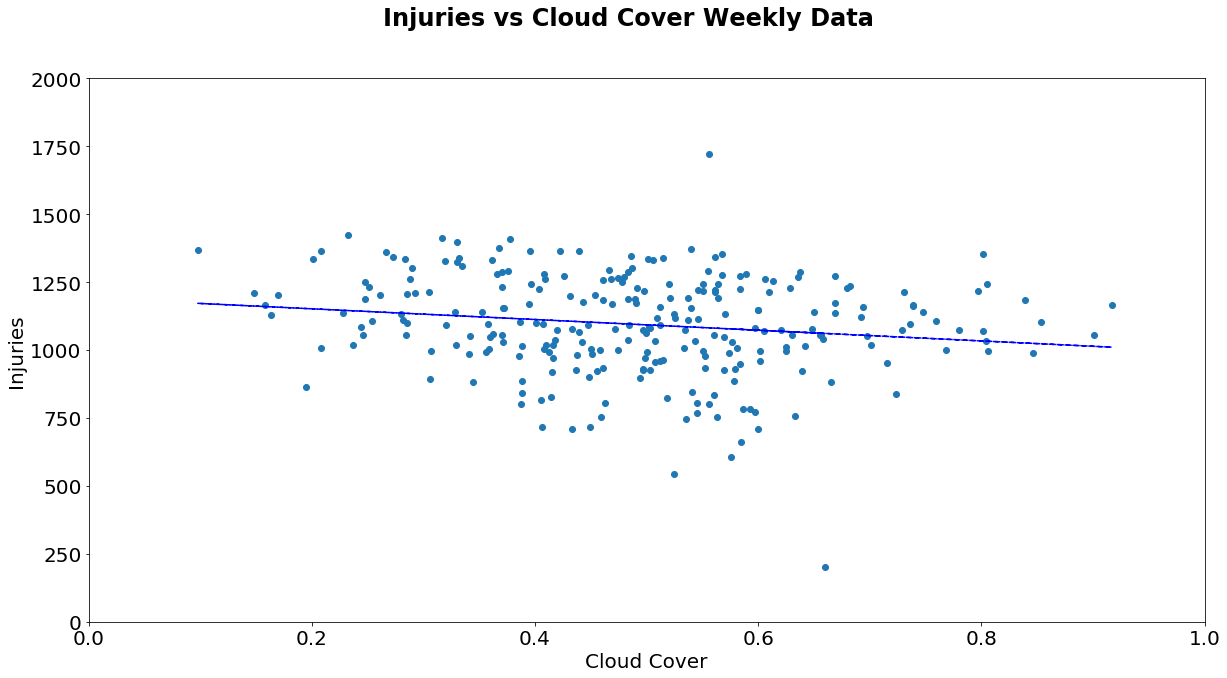

r-squared: 0.027000254741942085
p value: 0.007814211236695475
Standard Error: 73.46997389809692


In [37]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Cloud Cover Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 2000)

ax.set_xlabel("Cloud Cover", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(s, y, linewidth=0, marker='o')
ax.plot(s, fit, 'b--')

plt.savefig("../Images/Injuries vs Weekly Cloud Cover")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(s,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [38]:
(slope, intercept, _, _, _) = linregress(t, y)
fit = slope * t + intercept

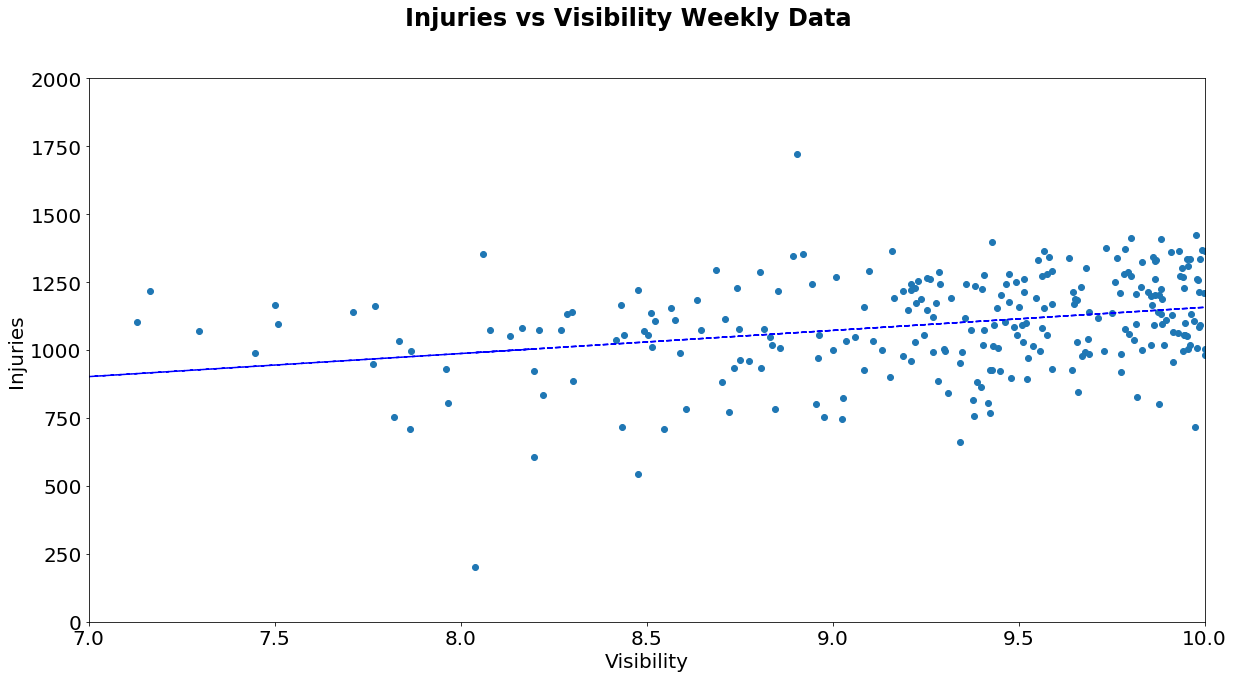

r-squared: 0.09400152633302211
p value: 4.3805505078836383e-07
Standard Error: 16.396931412295725


In [39]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Visibility Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(7, 10)
ax.set_ylim(0, 2000)

ax.set_xlabel("Visibility", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(t, y, linewidth=0, marker='o')
ax.plot(t, fit, 'b--')

plt.savefig("../Images/Injuries vs Weekly Visibility")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(t,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [40]:
df.describe()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2016.011494,26.402299,4277.390805,1094.164751,4.720307,47.802494,9.260093,0.491475,0.495693,2.576832,0.669085,0.003470
std,1.426353,15.091103,501.161659,183.019313,2.277467,16.490087,0.660158,0.152684,0.222264,1.158964,0.078618,0.004052
min,2014.000000,1.000000,621.000000,200.000000,0.000000,10.225070,6.849855,0.098184,0.098223,0.644533,0.453981,0.000000
25%,2015.000000,13.000000,4030.000000,996.000000,3.000000,34.266012,8.903154,0.387950,0.300080,1.633579,0.612245,0.000564
50%,2016.000000,26.000000,4287.000000,1097.000000,4.000000,48.048368,9.429604,0.497226,0.490709,2.313547,0.675299,0.002218
75%,2017.000000,39.000000,4560.000000,1226.000000,6.000000,64.110451,9.796562,0.583299,0.690373,3.257875,0.713111,0.004793
max,2019.000000,52.000000,7324.000000,1722.000000,13.000000,74.260866,10.000000,0.916851,0.886893,6.755580,0.874387,0.031700


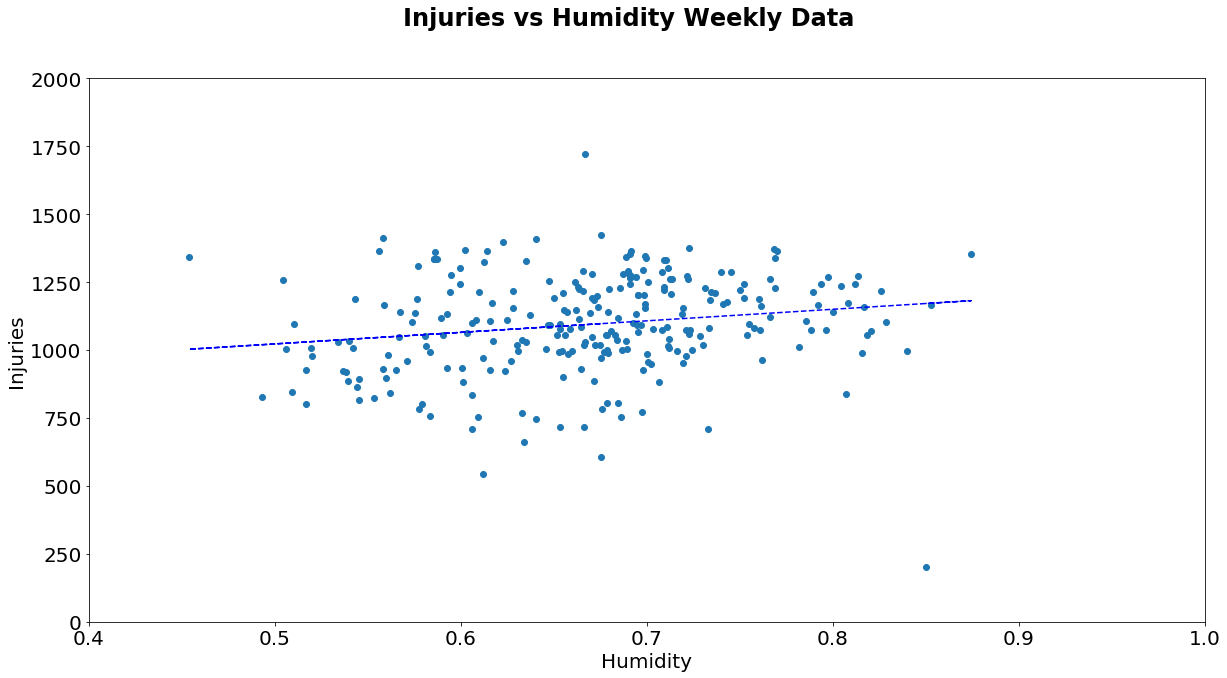

r-squared: 0.033298411029272466
p value: 0.003088768472992203
Standard Error: 142.22352621845195


In [41]:
(slope, intercept, _, _, _) = linregress(u, y)
fit = slope * u + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Humidity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0.4, 1)
ax.set_ylim(0, 2000)

ax.set_xlabel("Humidity", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(u, y, linewidth=0, marker='o')
ax.plot(u, fit, 'b--')

plt.savefig("../Images/Injuries vs Weekly Humidity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(u,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

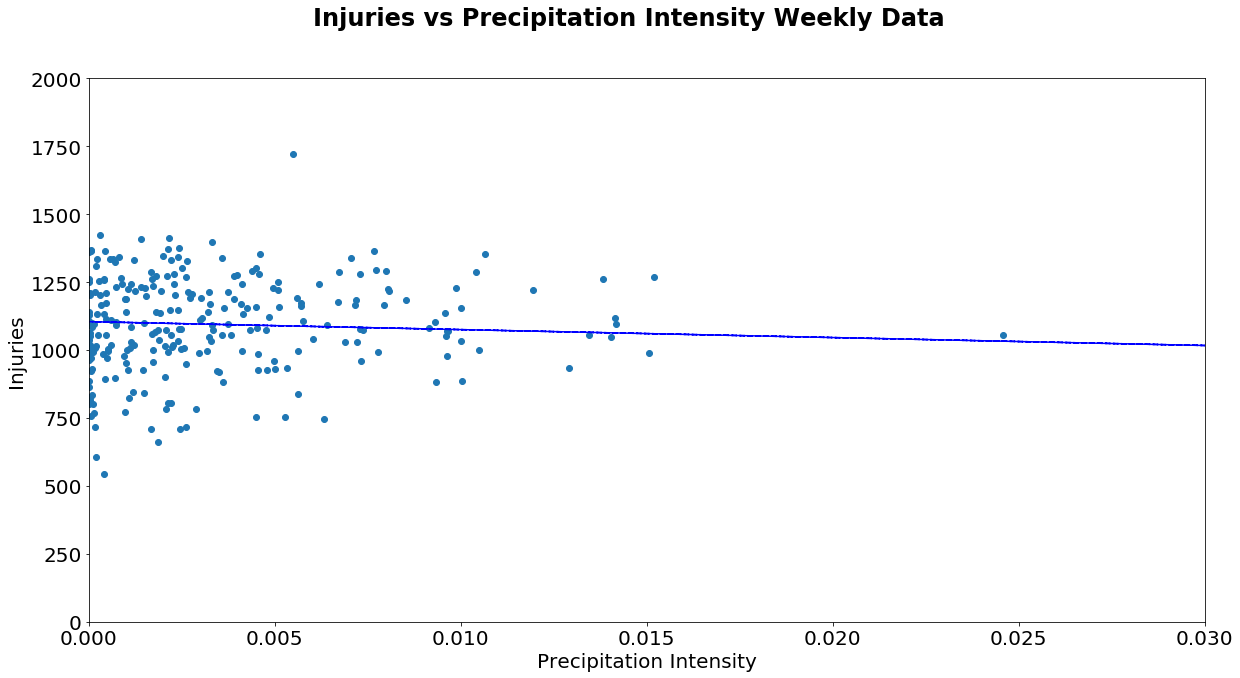

r-squared: 0.004194481819812591
p value: 0.2972353982614951
Standard Error: 2800.411832427167


In [42]:
(slope, intercept, _, _, _) = linregress(v, y)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Precipitation Intensity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 0.03)
ax.set_ylim(0, 2000)

ax.set_xlabel("Precipitation Intensity", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(v, y, linewidth=0, marker='o')
ax.plot(v, fit, 'b--')

plt.savefig("../Images/Injuries vs Weekly Precipitation Intensity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(v,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

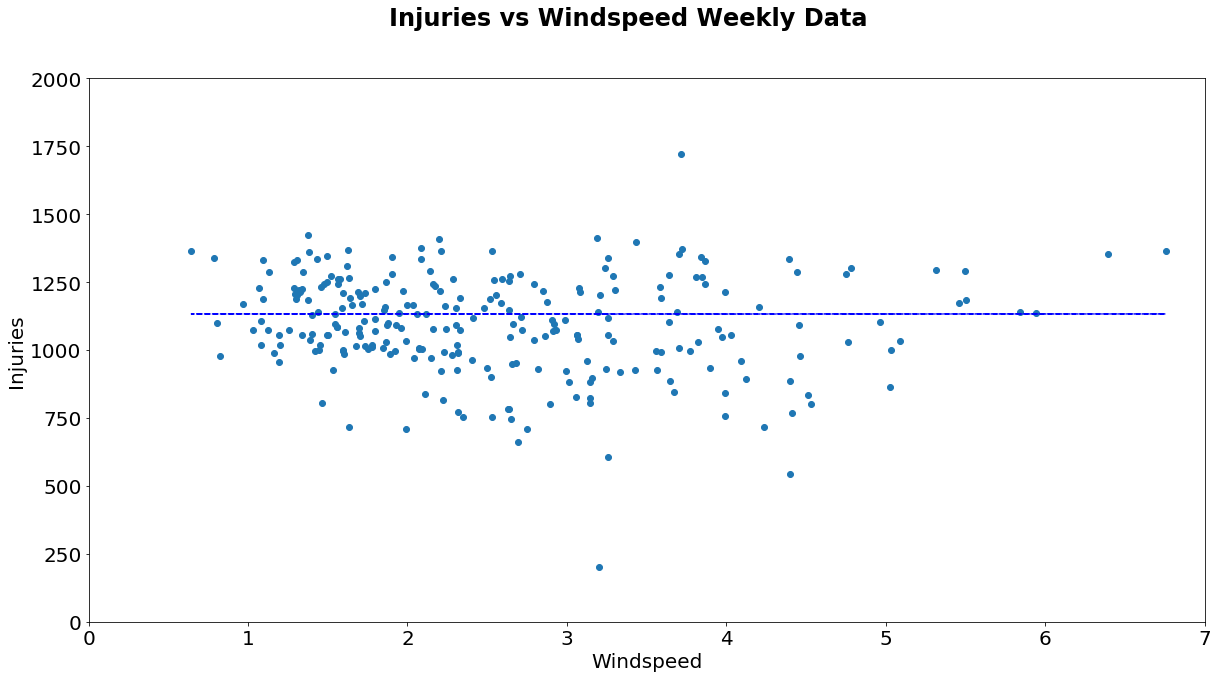

r-squared: 0.008973999487612395
p value: 0.1268808337143821
Standard Error: 9.768314663067176


In [43]:
(slope, intercept, _, _, _) = linregress(w, y)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Windspeed Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 7)
ax.set_ylim(0, 2000)

ax.set_xlabel("Windspeed", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(w, y, linewidth=0, marker='o')
ax.plot(w, fit, 'b--')

plt.savefig("../Images/Injuries vs Windspeed")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(w,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

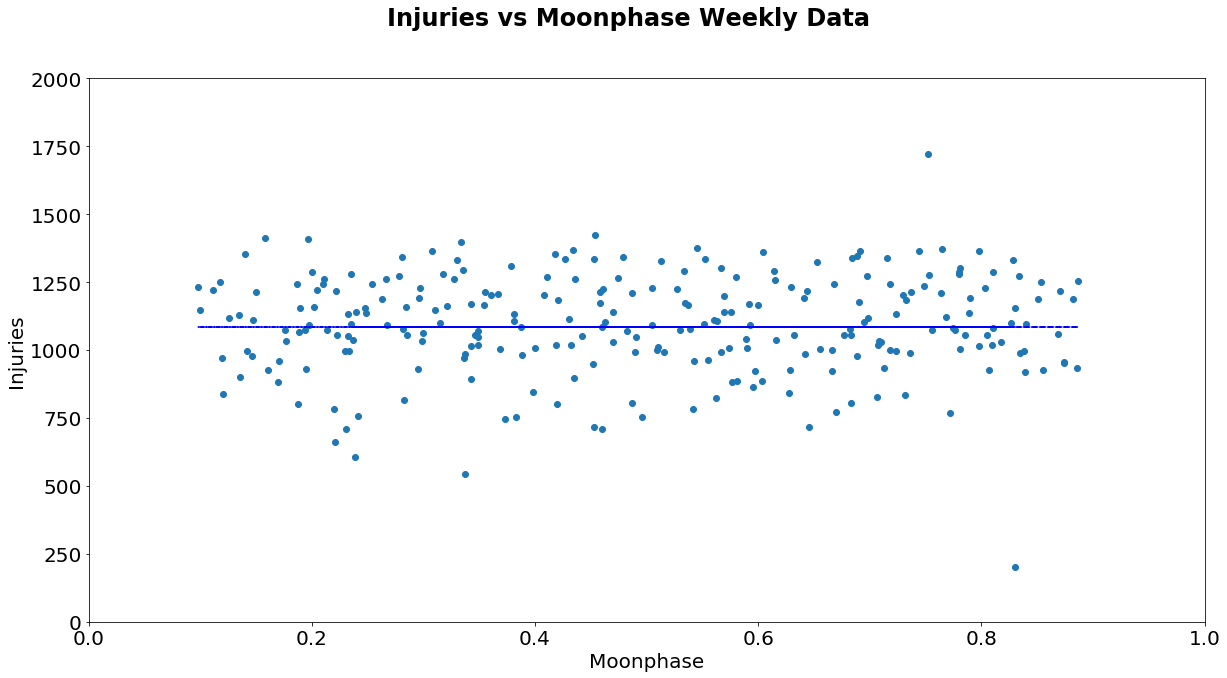

r-squared: 0.0005575004621027458
p value: 0.7041854744424463
Standard Error: 51.15139246605798


In [44]:
(slope, intercept, _, _, _) = linregress(r, y)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Moonphase Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 2000)

ax.set_xlabel("Moonphase", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(r, y, linewidth=0, marker='o')
ax.plot(r, fit, 'b--')

plt.savefig("../Images/Injuries vs Moonphase")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(r,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

# Collision Regression

In [45]:
(slope, intercept, _, _, _) = linregress(x, z)
fit = slope * x + intercept

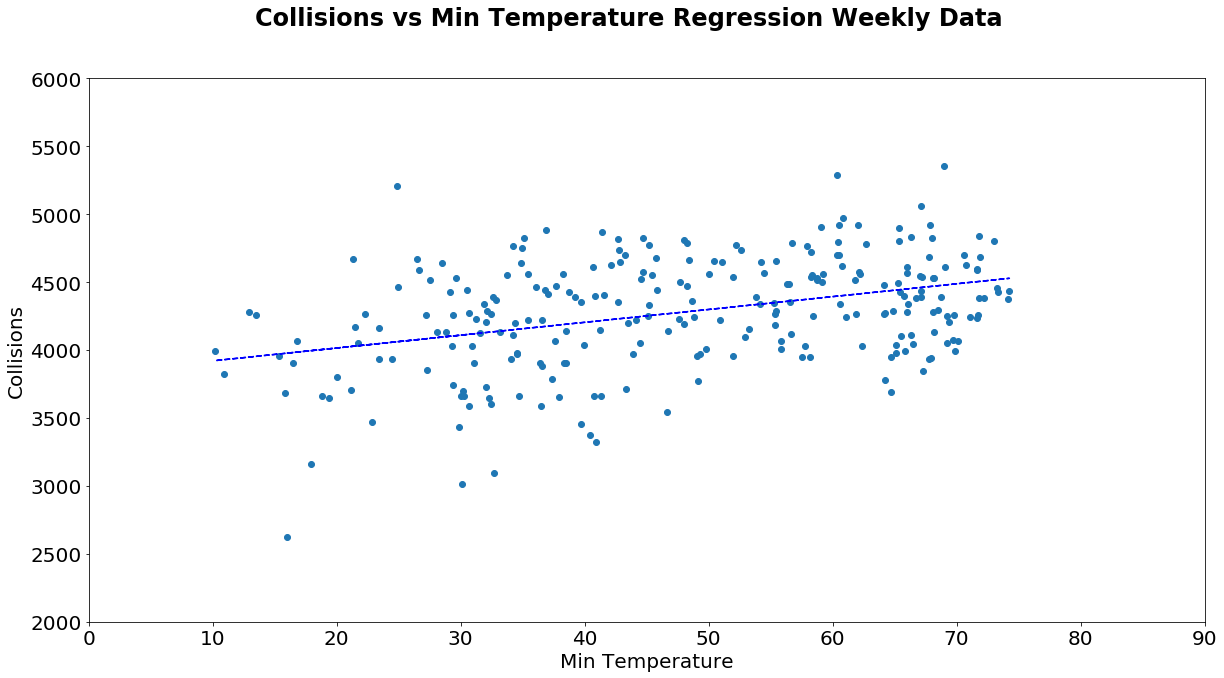

r-squared: 0.09673866784559608
p value: 2.921162241180816e-07
Standard Error: 1.794782002637963


In [46]:
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Min Temperature", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(x, z, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')
plt.savefig("../Images/Collisions vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

In [47]:
df.describe()

,Corrected Year for Year / Week,Corrected Week for Year / Week,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2016.011494,26.402299,4277.390805,1094.164751,4.720307,47.802494,9.260093,0.491475,0.495693,2.576832,0.669085,0.003470
std,1.426353,15.091103,501.161659,183.019313,2.277467,16.490087,0.660158,0.152684,0.222264,1.158964,0.078618,0.004052
min,2014.000000,1.000000,621.000000,200.000000,0.000000,10.225070,6.849855,0.098184,0.098223,0.644533,0.453981,0.000000
25%,2015.000000,13.000000,4030.000000,996.000000,3.000000,34.266012,8.903154,0.387950,0.300080,1.633579,0.612245,0.000564
50%,2016.000000,26.000000,4287.000000,1097.000000,4.000000,48.048368,9.429604,0.497226,0.490709,2.313547,0.675299,0.002218
75%,2017.000000,39.000000,4560.000000,1226.000000,6.000000,64.110451,9.796562,0.583299,0.690373,3.257875,0.713111,0.004793
max,2019.000000,52.000000,7324.000000,1722.000000,13.000000,74.260866,10.000000,0.916851,0.886893,6.755580,0.874387,0.031700


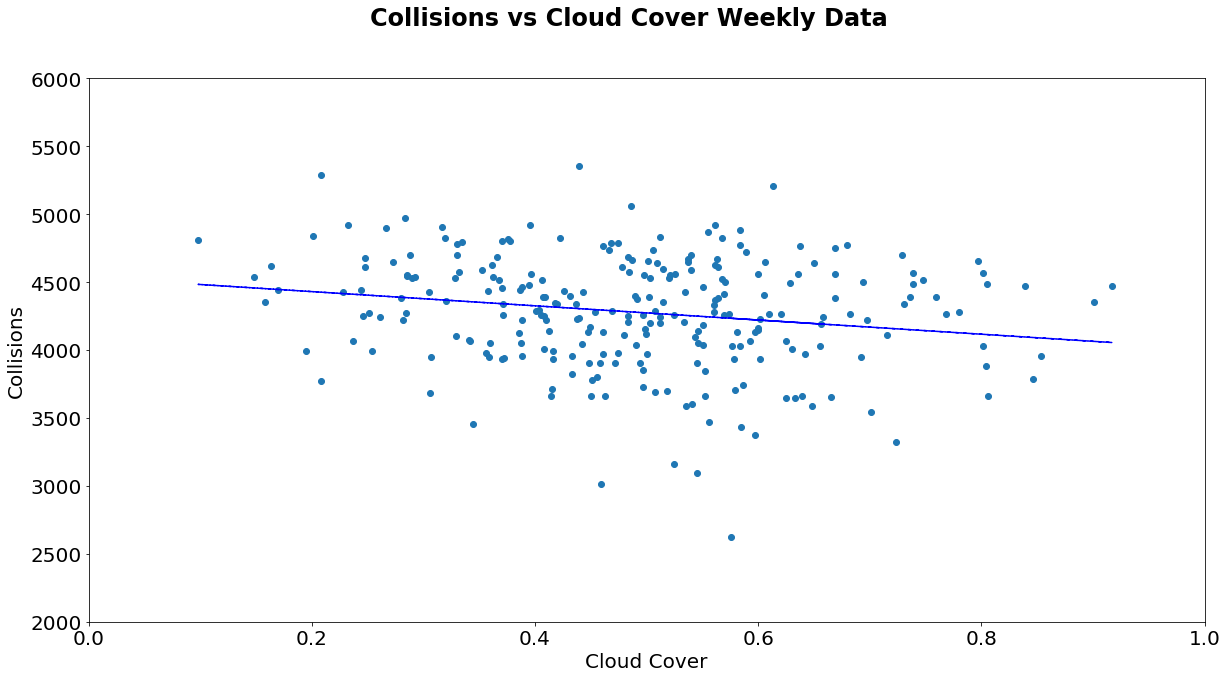

r-squared: 0.025347863006092215
p value: 0.0099885470998566
Standard Error: 201.35353534757218


In [48]:
(slope, intercept, _, _, _) = linregress(s, z)
fit = slope * s + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Cloud Cover Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Cloud Cover", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(s, z, linewidth=0, marker='o')
ax.plot(s, fit, 'b--')

plt.savefig("../Images/Collisions vs Weekly Cloud Cover")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(s,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

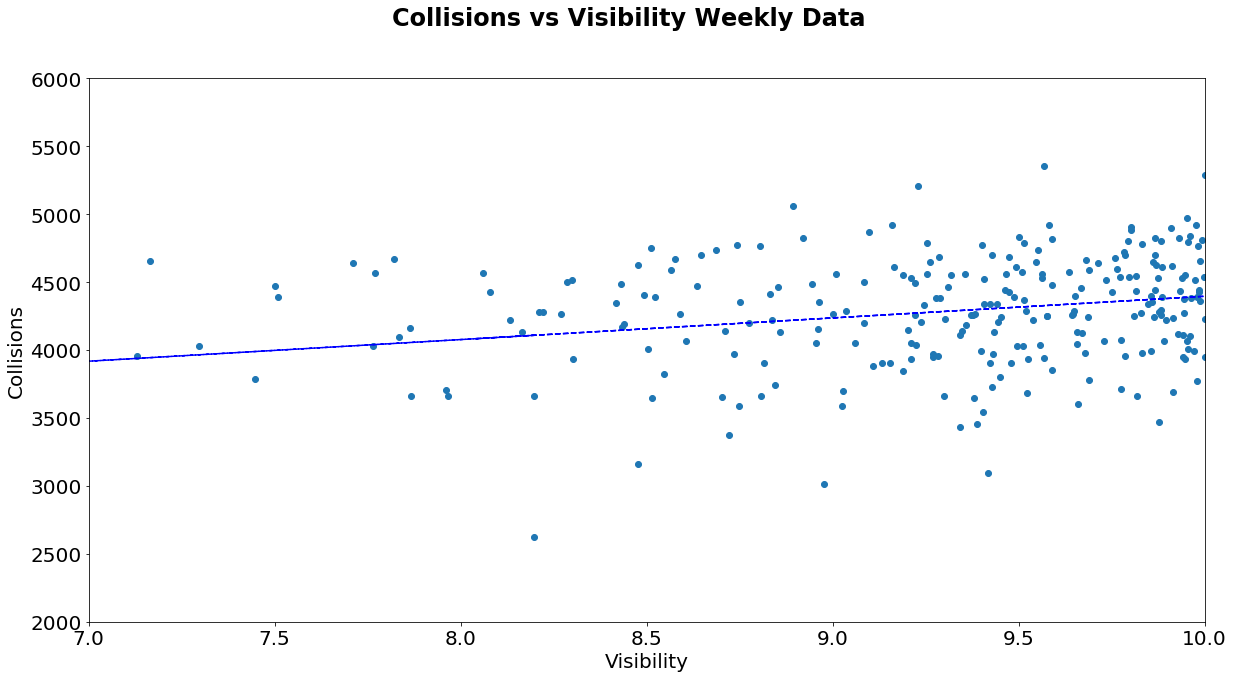

r-squared: 0.04399569417363519
p value: 0.0006487001218380786
Standard Error: 46.12216536513545


In [49]:
(slope, intercept, _, _, _) = linregress(t, z)
fit = slope * t + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Visibility Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(7, 10)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Visibility", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(t, z, linewidth=0, marker='o')
ax.plot(t, fit, 'b--')

plt.savefig("../Images/Collisions vs Weekly Visibility")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(t,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

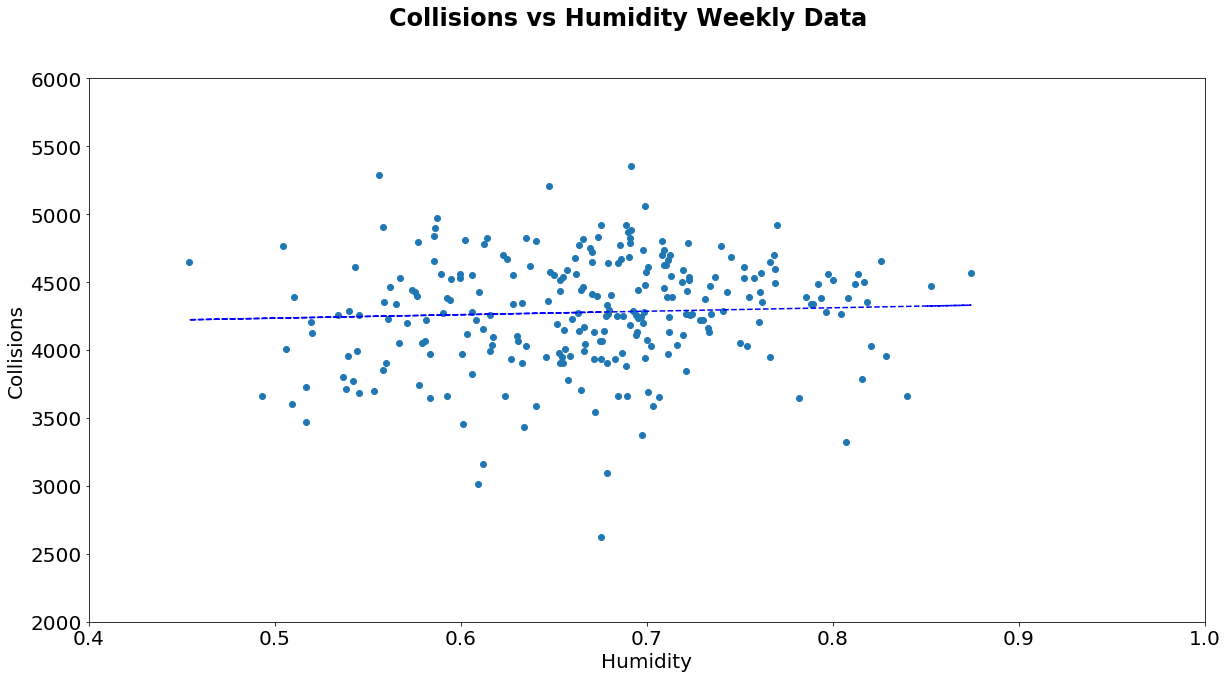

r-squared: 0.0015978623581514308
p value: 0.5202595994856309
Standard Error: 395.78460235430697


In [50]:
(slope, intercept, _, _, _) = linregress(u, z)
fit = slope * u + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Humidity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0.4, 1)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Humidity", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(u, z, linewidth=0, marker='o')
ax.plot(u, fit, 'b--')

plt.savefig("../Images/Collisions vs Weekly Humidity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(u,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

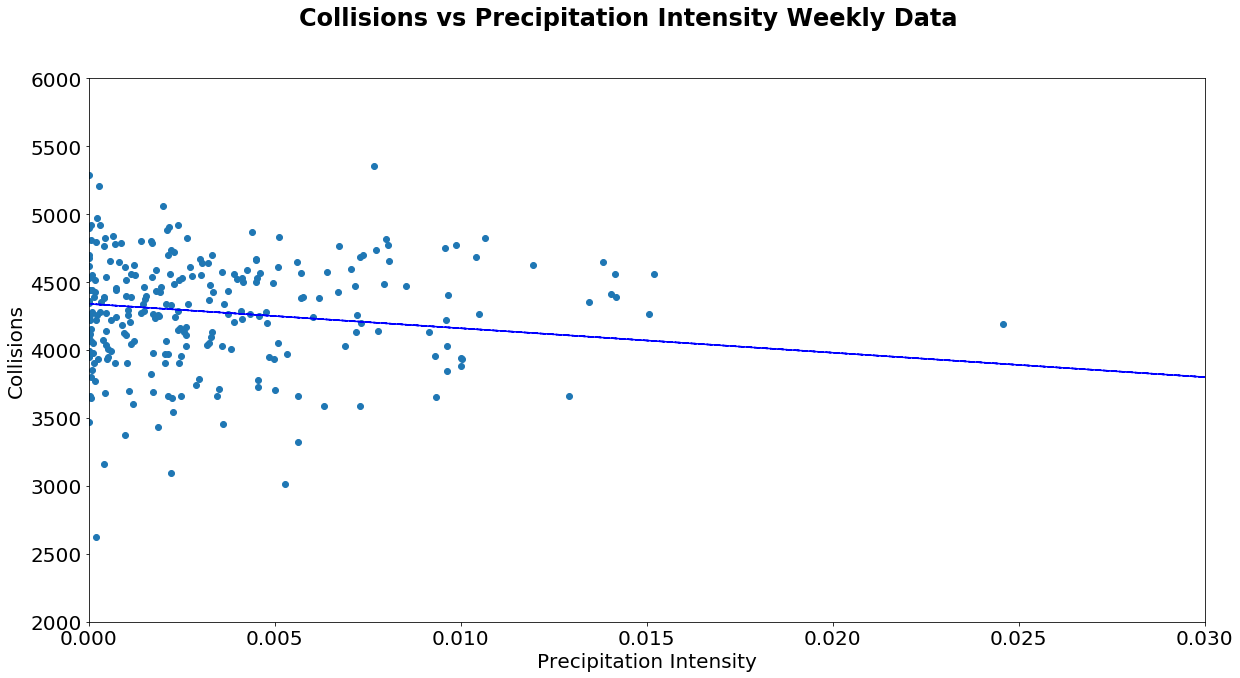

r-squared: 0.02112941197799557
p value: 0.01879475510478296
Standard Error: 7602.881067570094


In [51]:
(slope, intercept, _, _, _) = linregress(v, z)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Precipitation Intensity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 0.03)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Precipitation Intensity", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(v, z, linewidth=0, marker='o')
ax.plot(v, fit, 'b--')

plt.savefig("../Images/Collisions vs Weekly Precipitation Intensity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(v,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

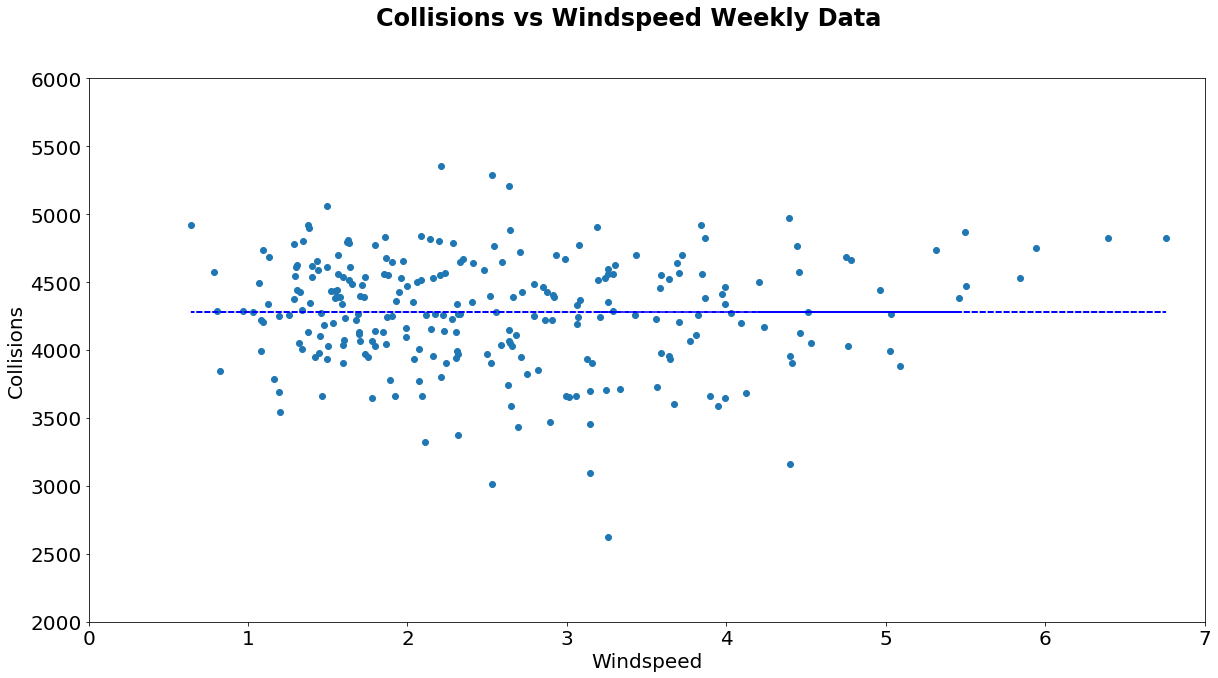

r-squared: 3.880160653981208e-06
p value: 0.9747347604675574
Standard Error: 26.869351909534643


In [52]:
(slope, intercept, _, _, _) = linregress(w, z)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Windspeed Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 7)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Windspeed", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(w, z, linewidth=0, marker='o')
ax.plot(w, fit, 'b--')

plt.savefig("../Images/Collisions vs Windspeed")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(w,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

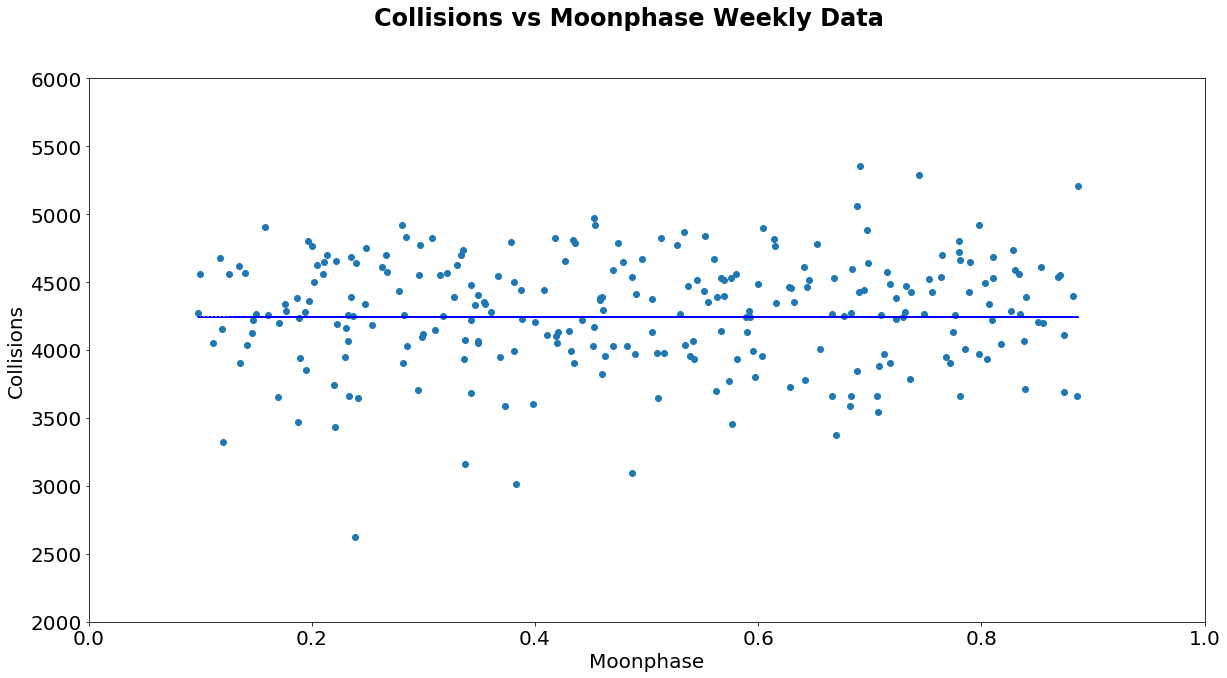

r-squared: 0.0010516314722348727
p value: 0.60199975499192
Standard Error: 140.03319330929796


In [53]:
(slope, intercept, _, _, _) = linregress(r, z)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Moonphase Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Moonphase", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(r, z, linewidth=0, marker='o')
ax.plot(r, fit, 'b--')

plt.savefig("../Images/Collisions vs Moonphase")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(r,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

# Death Regression (don't use as have enough with Collisions & Injuries while stats limited)

In [54]:
#(slope, intercept, _, _, _) = linregress(x, p)
#fit = slope * x + intercept

In [55]:
# fig, ax = plt.subplots()

# mpl.rcParams.update({'font.size': 20})

# fig.suptitle("Deaths vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

# ax.set_xlim(0, 90)
# ax.set_ylim(0, 15)

# ax.set_xlabel("Min Temperature")
# ax.set_ylabel("Deaths")

# ax.plot(x, p, linewidth=0, marker='o')
# ax.plot(x, fit, 'b--')
# plt.savefig("../Images/Collisions vs Weekly Avg Min Temp")
# plt.show()

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,p)
# print("r-squared:", r_value**2)
# print("p value:", p_value)
# print("Standard Error:", std_err)

In [56]:
df.columns

Index(['Corrected Year for Year / Week', 'Corrected Week for Year / Week',
       'Collisions', 'Injuries', 'Deaths', 'Avg Min Temp', 'Visibility',
       'Cloud Cover', 'Moonphase', 'Windspeed', 'Humidity',
       'Precipitation Intensity', 'Year / Week'],
      dtype='object')

In [57]:
#df.drop(['Corrected Year for Year / Week', 'Corrected Week for Year / Week', 'Year / Week'], axis=1)

In [58]:
# Reindex above on Year Week and remove Corrected Year / Week

In [59]:
del df['Corrected Year for Year / Week']


In [60]:
del df['Corrected Week for Year / Week']

In [61]:
df.columns

Index(['Collisions', 'Injuries', 'Deaths', 'Avg Min Temp', 'Visibility',
       'Cloud Cover', 'Moonphase', 'Windspeed', 'Humidity',
       'Precipitation Intensity', 'Year / Week'],
      dtype='object')

In [62]:
#df.set_index('Year / Week').head(2)

In [63]:
df.head(2)

,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity,Year / Week
0,2627,608.0,7.0,15.976783,8.197758,0.575569,0.238919,3.258481,0.675299,0.000186,2014/1
1,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006,2014/2


In [64]:
df.set_index('Year / Week').head(2)

,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
Year / Week,,,,,,,,,,
2014/1,2627,608.0,7.0,15.976783,8.197758,0.575569,0.238919,3.258481,0.675299,0.000186
2014/2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006


In [65]:
#df.reset_index().head(2)

In [66]:
df['Year / Week'][0]

'2014/1'

In [67]:
#my_list = df["Year / Week"].values
#my_list
#x=('Year / Week'),  xticks=(df.index), 

In [68]:
#figsize(8,6)
#use_index=(True)

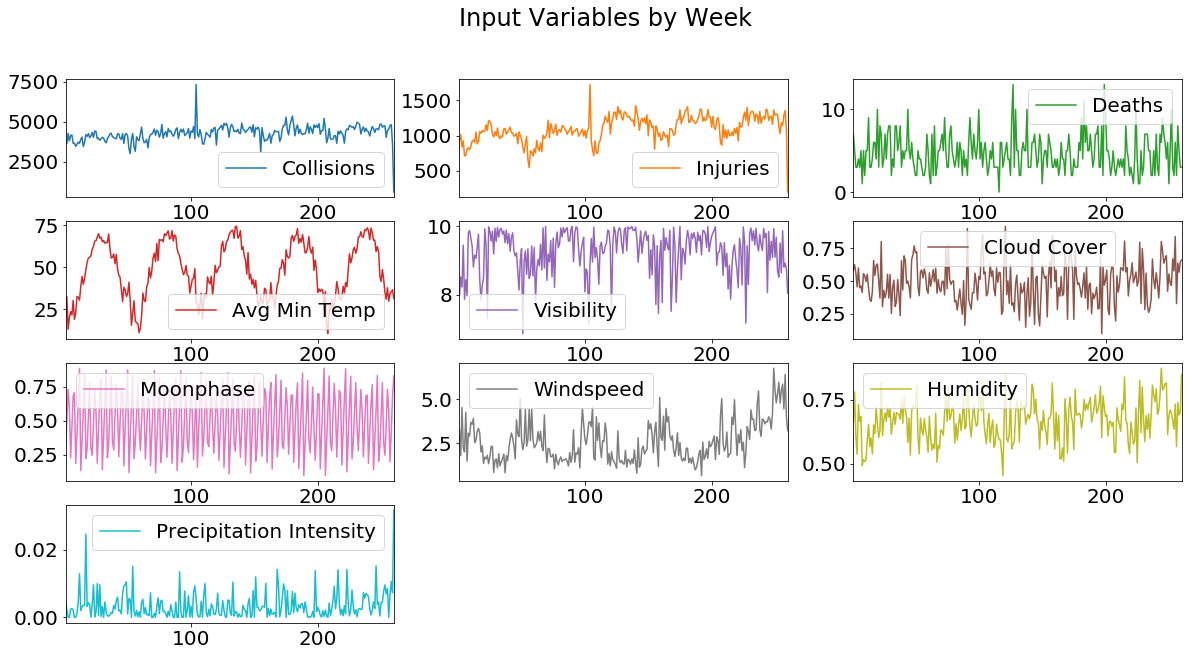

In [69]:
ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
ax.set_fontweight=('bold')
df.plot(title=('Input Variables by Week'), ax = plt.axes(), fontsize=(20), xlim=(1, 260), subplots=True, layout=(4, 3), figsize=(40, 30), sharex=False)
fig = plt.gcf()
fig.savefig("../images/Summary Plots")

In [70]:
del df['Deaths']

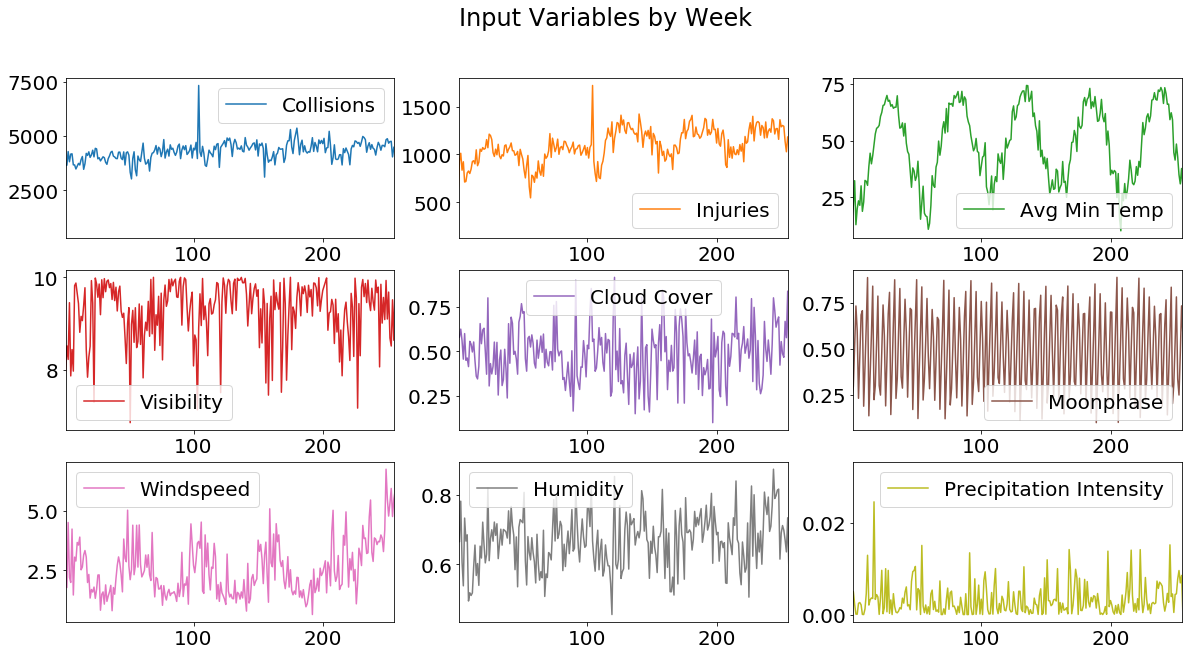

In [84]:
ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
ax.set_fontweight=('bold')
df.plot(title=('Input Variables by Week'), ax = plt.axes(), fontsize=(20), xlim=(1, 255), subplots=True, layout=(3, 3), figsize=(40, 30), sharex=False)
fig = plt.gcf()
fig.savefig("../images/Summary Plots")

In [72]:
import scipy.stats as stats

In [83]:
df.columns

Index(['Collisions', 'Injuries', 'Avg Min Temp', 'Visibility', 'Cloud Cover',
       'Moonphase', 'Windspeed', 'Humidity', 'Precipitation Intensity',
       'Year / Week'],
      dtype='object')

## From regression best correlation & significance from Injuries vs Avg Min Temp

In [85]:
df.drop(['Collisions', 'Visibility', 'Cloud Cover',
       'Moonphase', 'Windspeed', 'Humidity', 'Precipitation Intensity',
       'Year / Week'], axis = 1, inplace = True)

In [ ]:
# slope = 6.531992617076217
# intercept = 781.919210373117
# df['Expected'] = (df['Avg Min Temp']* slope) + intercept

## Chi Test

In [89]:
df['Expected'] = (df['Avg Min Temp']*6.531992617076217) + 781.919210373117

In [101]:
#del df['Avg Min Temp']
#df.head(2)

In [103]:
df.head()

,Injuries,Expected
0,608.0,886.279442
1,929.0,920.290996
2,1012.0,992.914784
3,835.0,866.316909
4,923.0,912.584041


In [104]:
len(df)

261

In [109]:
critical_value = stats.chi2.ppf(q = 0.95, df = 260)
critical_value

240.63962376585218

In [107]:
stats.chisquare(df['Injuries'], df['Expected'])

Power_divergenceResult(statistic=5425.456006740642, pvalue=0.0)